In [47]:
#script to generate plots
#dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#### Import and read the data 

In [3]:
# read saved claen consolidated_data.csv data

file_path = 'Resources/clean_consolidated_data.csv'
clean_consolidated_data = pd.read_csv(file_path) 

# Display sample data
clean_consolidated_data.head()

,Unnamed: 0.1,Unnamed: 0,UNITID,Institution Name,State,Region,Predominant Degree,Type of School,Admission Rate,Instate Tuition and Fees,...,Bachelor of Engineering,Bachelor of English,Bachelor of Bio / Biomedical Sci,Bachelor of Math,Bachelor of Philosophy/Religion,Bachelor of Psychology,Bachelor of Social Science,Bachelor of Visual / Performing Arts,Bachelor of Business / Marketing,Bachelor of History
0,0,0,100654,Alabama A & M University,AL,Southeast,3,Public,0.5010,6828.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1,1,100663,University of Alabama at Birmingham,AL,Southeast,3,Public,0.7223,6264.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,3,100706,University of Alabama in Huntsville,AL,Southeast,3,Public,0.6368,8094.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,4,100724,Alabama State University,AL,Southeast,3,Public,0.5080,8082.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4,5,100751,The University of Alabama,AL,Southeast,3,Public,0.4353,8600.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Plot Region Vs Tuition fees 

In [95]:
#group by Region 
Plot_Region_Tuition = clean_consolidated_data.groupby('Region')['Instate Tuition and Fees'].agg(['mean'])#, 'median', 'var', 'std', 'sem'])

Plot_Region_Tuition = Plot_Region_Tuition.sort_values(by='mean', ascending=False)
Plot_Region_Tuition

,mean
Region,
New England,25064.060000
Mid-atlantic,22504.893939
West,20269.465753
East north central,19843.625532
West North central,18172.676692
Southeast,15658.043478
Southwest,14921.213675
North Central,12213.500000
U.S. Territories,5230.095238


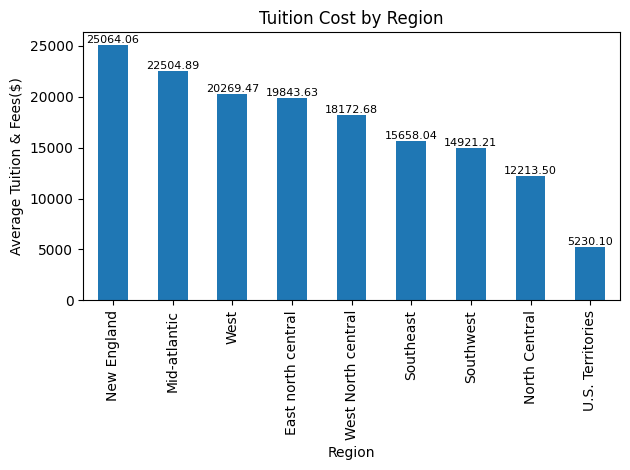

In [136]:
Plot_Region_Tuition.plot(kind='bar', rot=90, xlabel='Region', ylabel='Average Tuition & Fees($)')
plt.title('Tuition Cost by Region')

# Hide the legend
plt.legend().set_visible(False)

# Add values on top of each bar
for index, value in enumerate(Plot_Region_Tuition['mean']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8, color='black')

    
plt.tight_layout()
plt.savefig("Resources/TuitionVsRegion_mh.png")
plt.show()    
# Show the plot
plt.show()

**The tuition fee in universities/colleges located in the New England and Mid-Atlantic regions has been identified as the highest compared to North central and U.S. Territories. 

#### Plot Type of school Vs Tuition fees 

In [99]:
#group by Type 
Plot_Type_Tuition = clean_consolidated_data.groupby('Type of School')['Instate Tuition and Fees'].agg(['mean']).round(2)   #.rename('Average Tuition & Fees') #, 'median', 'var', 'std', 'sem'])

Plot_Type_Tuition = Plot_Type_Tution.sort_values(by='mean', ascending=False)
Plot_Type_Tuition

,mean
Type of School,
Private Non-Profit,26357.36
Private For-Profit,17058.45
Public,7845.47


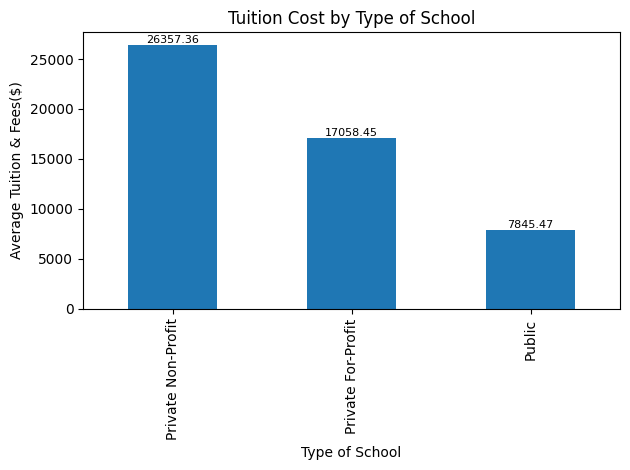

In [135]:
Plot_Type_Tuition.plot(kind='bar', rot=90, xlabel='Type of School', ylabel='Average Tuition & Fees($)')
plt.title('Tuition Cost by Type of School')

# Hide the legend
plt.legend().set_visible(False)
# Add values on top of each bar
for index, value in enumerate(Plot_Type_Tuition['mean']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8, color='black')


#save the fig
plt.tight_layout()
plt.savefig("Resources/TuitionVsType_mh.png")
# Show the plot
plt.show()

****Private non-profit universities/colleges have been identified as having the highest tuition fees compared to public institutions, which in contrast, offer the lowest tuition rates.

#### Plot Major Vs Tuition fees 

In [149]:
major_list = ['Bachelor of Agriculture',
              'Bachelor of Ethnic, Cultural or Gender Studies',
              'Bachelor of Comms - Journalism',
              'Bachelor of Comp Sci / IT',
              'Bachelor of Education',
              'Bachelor of Engineering',
              'Bachelor of English',
              'Bachelor of Bio / Biomedical Sci',
              'Bachelor of Math',
              'Bachelor of Philosophy/Religion',
              'Bachelor of Psychology',
              'Bachelor of Social Science',
              'Bachelor of Visual / Performing Arts',
              'Bachelor of Business / Marketing',
              'Bachelor of History']

major_data = []

for x in major_list:
    # Filter the data for each major and calculate the mean and median
    major_data_df = clean_consolidated_data[clean_consolidated_data[x] == 1]
    mean_value = major_data_df['Instate Tuition and Fees'].mean()
    med_value = major_data_df['Instate Tuition and Fees'].median()

    major_data.append({'Major': x, 'Mean': mean_value, 'Median': med_value})

major_df2 = pd.DataFrame(major_data)


#save the dataframe for table prsentation
major_df2.to_csv('Resources/MajorMean_mh.csv', index=False)

#### Plot Major Vs Tuition fees 

In [80]:
major_list = ['Bachelor of Agriculture',
              'Bachelor of Ethnic, Cultural or Gender Studies',
              'Bachelor of Comms - Journalism',
              'Bachelor of Comp Sci / IT',
              'Bachelor of Education',
              'Bachelor of Engineering',
              'Bachelor of English',
              'Bachelor of Bio / Biomedical Sci',
              'Bachelor of Math',
              'Bachelor of Philosophy/Religion',
              'Bachelor of Psychology',
              'Bachelor of Social Science',
              'Bachelor of Visual / Performing Arts',
              'Bachelor of Business / Marketing',
              'Bachelor of History']

major_data = []

for x in major_list:
    # Filter the data for each major and calculate the mean and median
    major_data_df = clean_consolidated_data[clean_consolidated_data[x] == 1]
    mean_value = major_data_df['Instate Tuition and Fees'].mean()
    med_value = major_data_df['Instate Tuition and Fees'].median()

    major_data.append({'Major': x, 'Mean': mean_value, 'Median': med_value})

major_df = pd.DataFrame(major_data)

# Set the 'Major' column as the index to remove the default index (0 to 14)
major_df.set_index('Major', inplace=True)

# columns without the index (0 to 14)
major_df = major_df[['Mean', 'Median']]

major_df

,Mean,Median
Major,,
Bachelor of Agriculture,11582.570513,7700.0
"Bachelor of Ethnic, Cultural or Gender Studies",20427.683761,13943.5
Bachelor of Comms - Journalism,18524.802083,17952.0
Bachelor of Comp Sci / IT,18258.401653,18048.0
Bachelor of Education,18693.521739,18448.0
Bachelor of Engineering,17624.559211,12565.0
Bachelor of English,19227.728230,19124.0
Bachelor of Bio / Biomedical Sci,18952.309684,18870.0
Bachelor of Math,19018.553408,18798.0


In [ ]:
#Major_Mean
Major_Mean=major_df[['Mean']]
Major_Mean= Major_Mean.sort_values(by='Mean', ascending=False)


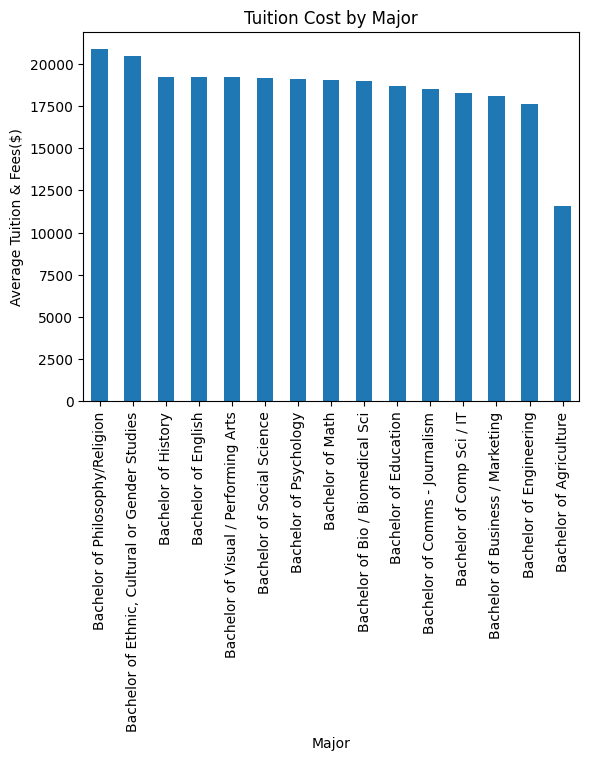

In [143]:
#plot major vs tuition
Plot_Major_Tuition=Major_Mean.plot(kind='bar', rot=90, xlabel='Major', ylabel='Average Tuition & Fees($)')
plt.title('Tuition Cost by Major')
plt.legend().set_visible(False)

#save the fig
plt.savefig("Resources/TuitionVsMajor_mh.png",bbox_inches='tight')
plt.show() 

**The average tuition fee for Bachelor of Agriculture is relatively lower compared to Philosophy/Religion and Ethnic Cultural or Gender Studies. 

#### Correlation: Tuition and Debt at graduation

In [36]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
   # Return the calculated values
    return slope, intercept, r_value, std_err

The r-value is: r = 0.21983476830956505


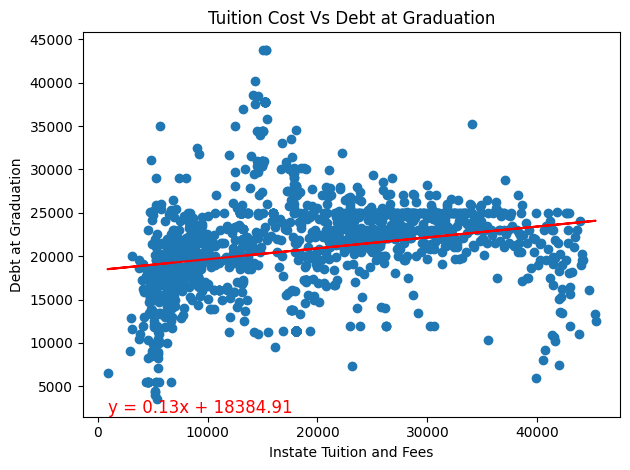

In [142]:
Tuition_Debt = linear_regression(clean_consolidated_data['Instate Tuition and Fees'], clean_consolidated_data['Median Debt at Graduation'])

# Scatter plot
plt.scatter(clean_consolidated_data['Instate Tuition and Fees'], clean_consolidated_data['Median Debt at Graduation'])

# Plot the linear regression line
plt.plot(clean_consolidated_data['Instate Tuition and Fees'], Tuition_Debt[0] * clean_consolidated_data['Instate Tuition and Fees'] + Tuition_Debt[1],
         color='red', label='Linear Regression')

plt.xlabel('Instate Tuition and Fees')
plt.ylabel('Debt at Graduation')
plt.title('Tuition Cost Vs Debt at Graduation')

# Display the regression equation in the plot
equation = f'y = {Tuition_Debt[0]:.2f}x + {Tuition_Debt[1]:.2f}'

plt.text(clean_consolidated_data['Instate Tuition and Fees'].min(), clean_consolidated_data['Median Debt at Graduation'].min(),
         equation, fontsize=12, color='red', ha='left', va='top')

print(f"The r-value is: r = {Tuition_Debt[2]}")
# save the fig
plt.tight_layout()
plt.savefig("Resources/TuitionVsDebt_mh.png",bbox_inches='tight')

plt.show()


**The correlation coefficient(r) indicates a weak positive correlation between Tuition and Debt at Graduation. Debt at graduation can also affected by other factors such as major type, types of school and regions.   

**From the equation y=0.13x + 18384.91,for every one-unit increase increase in tuition debt at graduation increased by 0.13.



